## Restricted Boltzmann Machines

In [2]:
%pylab inline
# import numpy
import numpy as np
from tqdm import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Define a shallow RBM
class rbm(object):
    def __init__(self, input_size, hidden_size):
        self.weights = self.get_weights((input_size, hidden_size))
        self.sigmoid = np.vectorize(self.sigmoid)
        self.sigmoid_delta = np.vectorize(self.sigmoid_delta)
        self.turn_on = np.vectorize(self.turn_on)
        self.schmitt = np.vectorize(self.schmitt)
        self.schmitt2 = np.vectorize(self.schmitt2)
        
    def feed_forward(self, input):
        return self.turn_on(self.sigmoid(np.dot(input, self.weights)))
    
    def get_adjust(self, input):
        forward = self.feed_forward(input)
        backward = self.feed_backward(forward)
        adjust_pos = self.schmitt2((self.schmitt((forward * self.weights))) + (self.schmitt(input * self.weights.T).T)) 
        adjust_neg = self.schmitt2(self.schmitt(forward * self.weights)+self.schmitt(backward * self.weights.T).T)
#         adjust_pos = ((forward * self.weights).T * input).T
#         adjust_neg = ((backward * self.weights.T).T * forward)
        return adjust_pos - adjust_neg
    
    def schmitt2(self, input):
        return (0 if input == 1 else 1)
    
    def schmitt(self, input):
        return (0 if input == 0 else 1)
    
    def get_adjustav(self, input, learningrate):
        adjust = learningrate * self.schmitt(self.get_adjust(input[0]))
        for i in xrange(1, len(input)):
            adjust += learningrate * self.schmitt(self.get_adjust(input[i]))
        return (adjust / len(input))
    
    def feed_backward(self, input):
        return self.turn_on(self.sigmoid(np.dot(input, self.weights.T)))
    
    def get_weights(self, dimensions):
        return np.random.normal(0,1,dimensions)
        
    def delta_func1(self, output, truths):
        return (output-truths)
    
    def turn_on(self, a):
        return (1 if a > 0.5 else 0)
    
    def sigmoid(self, z):
#         print "Z: %f" % z
        return 1/(1+np.exp(-z))
    
    def sigmoid_delta(self, z):
        return (np.exp(-z))/((1+np.exp(-z))**2)
    
print "RBM Initialized"

RBM Initialized


In [4]:
input_XOR = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]))
gtruth_XOR = np.transpose(np.array([[0],[1],[1],[0]]))
input_AND = np.transpose(np.array([[0,0],[0,1],[1,0],[1,1]]))
gtruth_AND = np.transpose(np.array([[0],[0],[0],[1]]))

In [5]:
np.random.seed(1)
rbm1 = rbm(6,2)
# input_s = input_AND.T
training_data = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
input_s = training_data

In [236]:
print "Adjustf : %s" % rbm1.schmitt2((rbm1.schmitt((rbm1.feed_forward(input_s[1]) * rbm1.weights))) + (rbm1.schmitt(input_s[1] * rbm1.weights.T).T)) 
print "Adjustb1: %s" % rbm1.schmitt(rbm1.feed_backward(rbm1.feed_forward(input_s[1])) * rbm1.weights.T).T
print "Adjustb2: %s" % rbm1.schmitt(rbm1.feed_forward(input_s[1]) * rbm1.weights)
print "Adjustb : %s" % rbm1.schmitt2(rbm1.schmitt(rbm1.feed_forward(input_s[1]) * rbm1.weights)+rbm1.schmitt(rbm1.feed_backward(rbm1.feed_forward(input_s[1])) * rbm1.weights.T).T)
print "Input: %s" % input_s
print "Weights: %s" % rbm1.weights
print "Forward: %s" % rbm1.feed_forward(input_s)
print "Backward: %s" % rbm1.feed_backward(rbm1.feed_forward(input_s))
print "Adjust: %s" % rbm1.get_adjustav(input_s, 0.1)
print "Adjustin: %s" % rbm1.get_adjust(input_s[1])

print "Adjustf2: %s" % ((rbm1.feed_forward(input_s[1]) * rbm1.weights).T * input_s[1]).T
print "Adjustb: %s" % ((rbm1.feed_backward(rbm1.feed_forward(input_s[1])) * rbm1.weights.T).T * rbm1.feed_forward(input_s[1]))

Adjustf : [[1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]]
Adjustb1: [[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]
Adjustb2: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Adjustb : [[1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Input: [[1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 0]]
Weights: [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]]
Forward: [[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]]
Backward: [[1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]
 [1 0 1 1 1 1]]
Adjust: [[ 0.05        0.05      ]
 [ 0.03333333  0.03333333]
 [ 0.          0.        ]
 [ 0.05        0.05      ]
 [ 0.06666667  0.06666667]
 [ 0.1         0.1       ]]
Adjustin: [[ 0  0]
 [ 0  0]
 [ 0  0]
 [-1  1]
 [-1  1]
 [-1  1]]
Adjustf2: [[ 1.62434536 -0.        ]
 [-0.         -0.        ]
 [ 0.86540763 -0.        ]
 [ 0.         -0.        ]
 [ 0.      

100%|██████████| 1000/1000 [00:04<00:00, 236.20it/s]


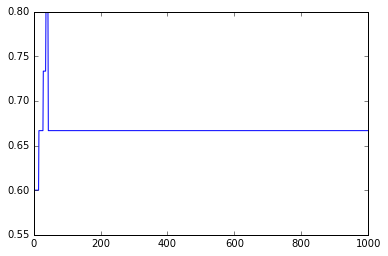

In [237]:
learningrate = 0.1
res = []
for i in tqdm(xrange(0, 1000)):
    ad = rbm1.get_adjustav(input_s, learningrate)
    res.append(np.sum(np.abs(ad)))
    rbm1.weights += ad
plot(res)

In [232]:
print "Adjust: %s" % rbm1.get_adjustav(input_s, 1)
print "Input: %s" % input_s
print "FF: %s" % rbm1.feed_forward(input_s)
print "Dream: %s" % rbm1.feed_backward(rbm1.feed_forward(input_s))

Adjust: [[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
Input: [[1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 0]]
FF: [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
Dream: [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [187]:
np.random.seed(1)
learningrate = 0.1
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
def schmitt(x):
    return (0 if x <= 0.5 else 1)
sigmoid = np.vectorize(sigmoid)
schmitt = np.vectorize(schmitt)
input_size = 6
feature_size = 2
vi = input_s
movies = ["Harry Potter","Avatar","LOTR","Gladiator","Titanic","Glitter"]
weights = np.abs(np.random.normal(0, 0.1, (input_size, feature_size)))
bj = np.abs(np.random.normal(0,0.1, (1, feature_size)))
bi = np.abs(np.random.normal(0, 0.1, (1, input_size)))

In [59]:
print "Vi: %s" % input_s
print "Wij: %s" % weights
print "Bj : %s" % bj
viwj = np.dot(input_s, weights)
print "Vi * Wij : %s" % viwj
biviwj = bj + viwj
print "Vi * Wij + Bj : %s" % biviwj
hi = schmitt(sigmoid(biviwj))
print "hi : %s" % hi

Vi: [[1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 0]]
Wij: [[ 0.16243454  0.06117564]
 [ 0.05281718  0.10729686]
 [ 0.08654076  0.23015387]
 [ 0.17448118  0.07612069]
 [ 0.03190391  0.02493704]
 [ 0.14621079  0.20601407]]
Bj : [[ 0.03224172  0.03840544]]
Vi * Wij : [[ 0.30179247  0.39862637]
 [ 0.2489753   0.29132951]
 [ 0.30179247  0.39862637]
 [ 0.29292585  0.3312116 ]
 [ 0.26102194  0.30627456]
 [ 0.29292585  0.3312116 ]]
Vi * Wij + Bj : [[ 0.33403419  0.43703181]
 [ 0.28121702  0.32973495]
 [ 0.33403419  0.43703181]
 [ 0.32516757  0.36961703]
 [ 0.29326366  0.34468   ]
 [ 0.32516757  0.36961703]]
hi : [[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [53]:
# Now get the matrices for each active neuron and active feature
input_act = [np.tile(vi[i], (feature_size,1)).T for i in xrange(0, len(vi))]
output_act = [np.tile(hi[0], (input_size,1)) for i in xrange(0, len(hi))]

In [56]:
total_act = [np.multiply(input_act[i], output_act[i]) for i in xrange(0, len(input_act))]

In [66]:
# now let's try moving backward
# We can be faster now
vi2 = schmitt(sigmoid(np.dot(hi, weights.T)+bi))
print "Reprojected Vector: %s" % vi2

Reprojected Vector: [[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


In [67]:
# Again, same drill
input_act2 = [np.tile(vi2[i], (feature_size,1)).T for i in xrange(0, len(vi2))]
output_act2 = [np.tile(hi[0], (input_size,1)) for i in xrange(0, len(hi))]
total_act2 = [np.multiply(input_act2[i], output_act2[i]) for i in xrange(0, len(input_act2))]
print "Total Activation: %s" % total_act2

Total Activation: [array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]]), array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]]), array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]]), array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]]), array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]]), array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])]


Now let's build a class.

In [210]:
class rbm2(object):
    def __init__(self, input_size, feature_size, learning_rate=0.1):
        self.inpsize = input_size
        self.feasize = feature_size
        self.lr = learning_rate
        self.weights = np.random.normal(0, 1, (input_size, feature_size))
        bj = np.random.normal(0, 1, (1, feature_size))
        self.sigmoid = np.vectorize(self.sigmoid)
        self.schmitt = np.vectorize(self.schmitt)

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def schmitt(self, x):
        return (0 if x <= 0.5 else 1)

    def feed_f(self, ival):
        # No biases yet
        hi = self.schmitt(self.sigmoid(np.dot(ival, self.weights)))
        input_act = [np.tile(ival[i], (self.feasize, 1)).T for i in xrange(0, len(ival))]
        output_act = [np.tile(hi[i], (self.inpsize, 1)) for i in xrange(0, len(hi))]
        total_act = [np.multiply(self.lr, np.multiply(input_act[i], output_act[i])) for i in xrange(0, len(input_act))]
        return total_act, hi

    def feed_b(self, hi):
        ival = self.schmitt(self.sigmoid(np.dot(hi, self.weights.T)))
        input_act = [np.tile(ival[i], (self.feasize, 1)).T for i in xrange(0, len(ival))]
        output_act = [np.tile(hi[i], (self.inpsize, 1)) for i in xrange(0, len(hi))]
        total_act = [np.multiply(self.lr, np.multiply(input_act[i], output_act[i])) for i in xrange(0, len(input_act))]
        return total_act, ival
    
    def train_epoch(self, ival, cd_chain):
        pos_act, hi = self.feed_f(ival)
        neg_act, ival_prime = self.feed_b(hi)
#         neg_act, ival_prime = self.feed_b(np.random.randint(2, size=hi.shape))
        
        for i in xrange(1, cd_chain):
            _, hi2 = self.feed_f(ival_prime)
            neg_act, ival_prime = self.feed_b(hi2)
        
        for i in xrange(0, len(pos_act)):
            self.weights += (pos_act[i]-neg_act[i])/len(pos_act)
        
        # Return some indicator of adjustments being made
        return np.sum(pos_act), np.sum(neg_act)
    
    def train(self, input_s, cd_chain, epochs=100):
        
        

IndentationError: expected an indented block (<ipython-input-210-b8533e6e024a>, line 48)

In [211]:
np.random.seed(2)
rbm2i = rbm2(6, 3, 1)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 593.82it/s]


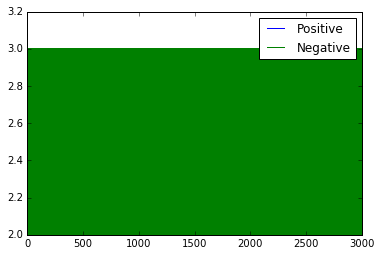

In [217]:
pos = []
neg = []
s_input = input_s[:]
# for i in tqdm(xrange(0, len(input_s))):
#     for j in xrange(0, 100):
#         p, n = rbm2i.train_epoch(input_s[i:(i+1)], 2)
#         pos.append(p)
#         neg.append(n)

for j in tqdm(xrange(0, 500)):
    for i in xrange(0, len(input_s)):
        p, n = rbm2i.train_epoch(input_s[i:(i+1)], 2)
        pos.append(p)
        neg.append(n)
        
plot(pos, label="Positive")
plot(neg, label="Negative")
legend()

In [205]:
print "Input: %s" % s_input
act, hi = rbm2i.feed_f(s_input)
print "Output: %s" % hi
nact, vi = rbm2i.feed_b(hi)
print "Daydream: %s" % vi
np.zeros(rbm2i.feasize)

Input: [[1 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 1 0]]
Output: [[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]
Daydream: [[1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [0 0 1 1 1 0]
 [0 0 1 1 1 0]
 [0 0 1 1 1 0]]


array([ 0.,  0.,  0.])

In [216]:
# Let's look for learned parameters here
for i in xrange(0, rbm2i.feasize):
    hip = np.zeros(rbm2i.feasize)
    hip[i] = 1
    print "Features: %s" % hip
    _, vi = rbm2i.feed_b([hip])
    print "Output: %s" % vi
    mv = ""
    for i in xrange(0, len(movies)): 
        if vi[0,i]!=0: 
            mv += " "+movies[i]
    print "Movies: %s" % mv

Features: [ 1.  0.  0.]
Output: [[1 1 1 0 0 0]]
Movies:  Harry Potter Avatar LOTR
Features: [ 0.  1.  0.]
Output: [[0 0 0 1 0 0]]
Movies:  Gladiator
Features: [ 0.  0.  1.]
Output: [[0 0 1 1 1 0]]
Movies:  LOTR Gladiator Titanic
